In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage

In [87]:
# Choose data characteristiscs
lenght = 1000
k = 10
c_std = 1


# Generate synthetic data
X, _ = make_blobs(n_samples=lenght, centers=k, cluster_std=c_std, random_state=1)

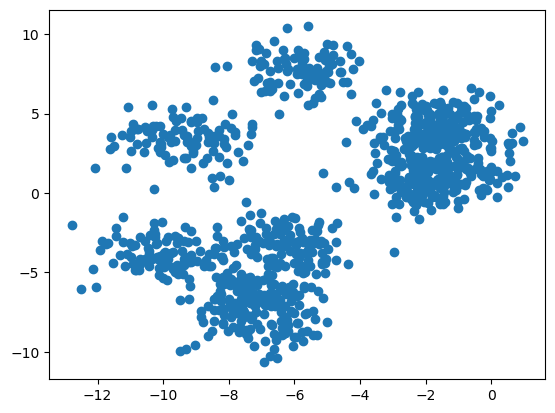

In [89]:
plt.scatter(X[:,0],X[:,1])

In [103]:
# Initialize KMeans with different initialization methods
kmeans_random = KMeans(n_clusters=k, init='random', n_init=1, random_state=0).fit(X)
kmeans_plusplus = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=0).fit(X)

# Using the same centroids for both Forgy and Random Partition isn't straightforward
# in scikit-learn, so i'll manually initialize centroids for demonstration
np.random.seed(0)
forgy_centroids = X[np.random.choice(X.shape[0], k, replace=False)]
random_partition_labels = np.random.choice(k, X.shape[0])
random_partition_centroids = np.array([X[random_partition_labels == i].mean(axis=0) for i in range(k)])

kmeans_forgy = KMeans(n_clusters=k, init=forgy_centroids, n_init=1, random_state=0).fit(X)
kmeans_random_partition = KMeans(n_clusters=k, init=random_partition_centroids, n_init=1, random_state=0).fit(X)

In [156]:
# Performing Agglomerative Clustering ‘ward’, ‘complete’, ‘average’, ‘single’ 

agg_cluster_ward = AgglomerativeClustering(
    linkage='ward',
    distance_threshold=6,
    n_clusters=None
).fit(X)
ward_linkage = linkage(X, 'ward')

agg_cluster_complete = AgglomerativeClustering(
    linkage='complete',
    distance_threshold=5,
    n_clusters=None
).fit(X)
complete_linkage = linkage(X, 'complete')

agg_cluster_average = AgglomerativeClustering(
    linkage='average',
    distance_threshold=3,
    n_clusters=None
).fit(X)
average_linkage = linkage(X, 'average')

agg_cluster_single = AgglomerativeClustering(
    linkage='single',
    distance_threshold=0.8,
    n_clusters=None
).fit(X)
single_linkage = linkage(X, 'single')

In [133]:
# DBSCAN clustering
dbs_min_samples = 10

dbscan25 = DBSCAN(eps=0.25, min_samples=dbs_min_samples).fit(X)

dbscan50 = DBSCAN(eps=0.5, min_samples=dbs_min_samples).fit(X)

dbscan75 = DBSCAN(eps=0.75, min_samples=dbs_min_samples).fit(X)

dbscan100 = DBSCAN(eps=1, min_samples=dbs_min_samples).fit(X)

In [135]:
# Creating a Gaussian Mixture Model
gmm_spherical = GaussianMixture(n_components=k, covariance_type = 'spherical', random_state=0).fit(X)
gmm_spherical_labels = gmm_spherical.predict(X)

gmm_diag = GaussianMixture(n_components=k, covariance_type = 'diag', random_state=0).fit(X)
gmm_diag_labels = gmm_diag.predict(X)

gmm_tied = GaussianMixture(n_components=k, covariance_type = 'tied', random_state=0).fit(X)
gmm_tied_labels = gmm_tied.predict(X)

gmm_full = GaussianMixture(n_components=k, covariance_type = 'full', random_state=0).fit(X)
gmm_full_labels = gmm_full.predict(X)

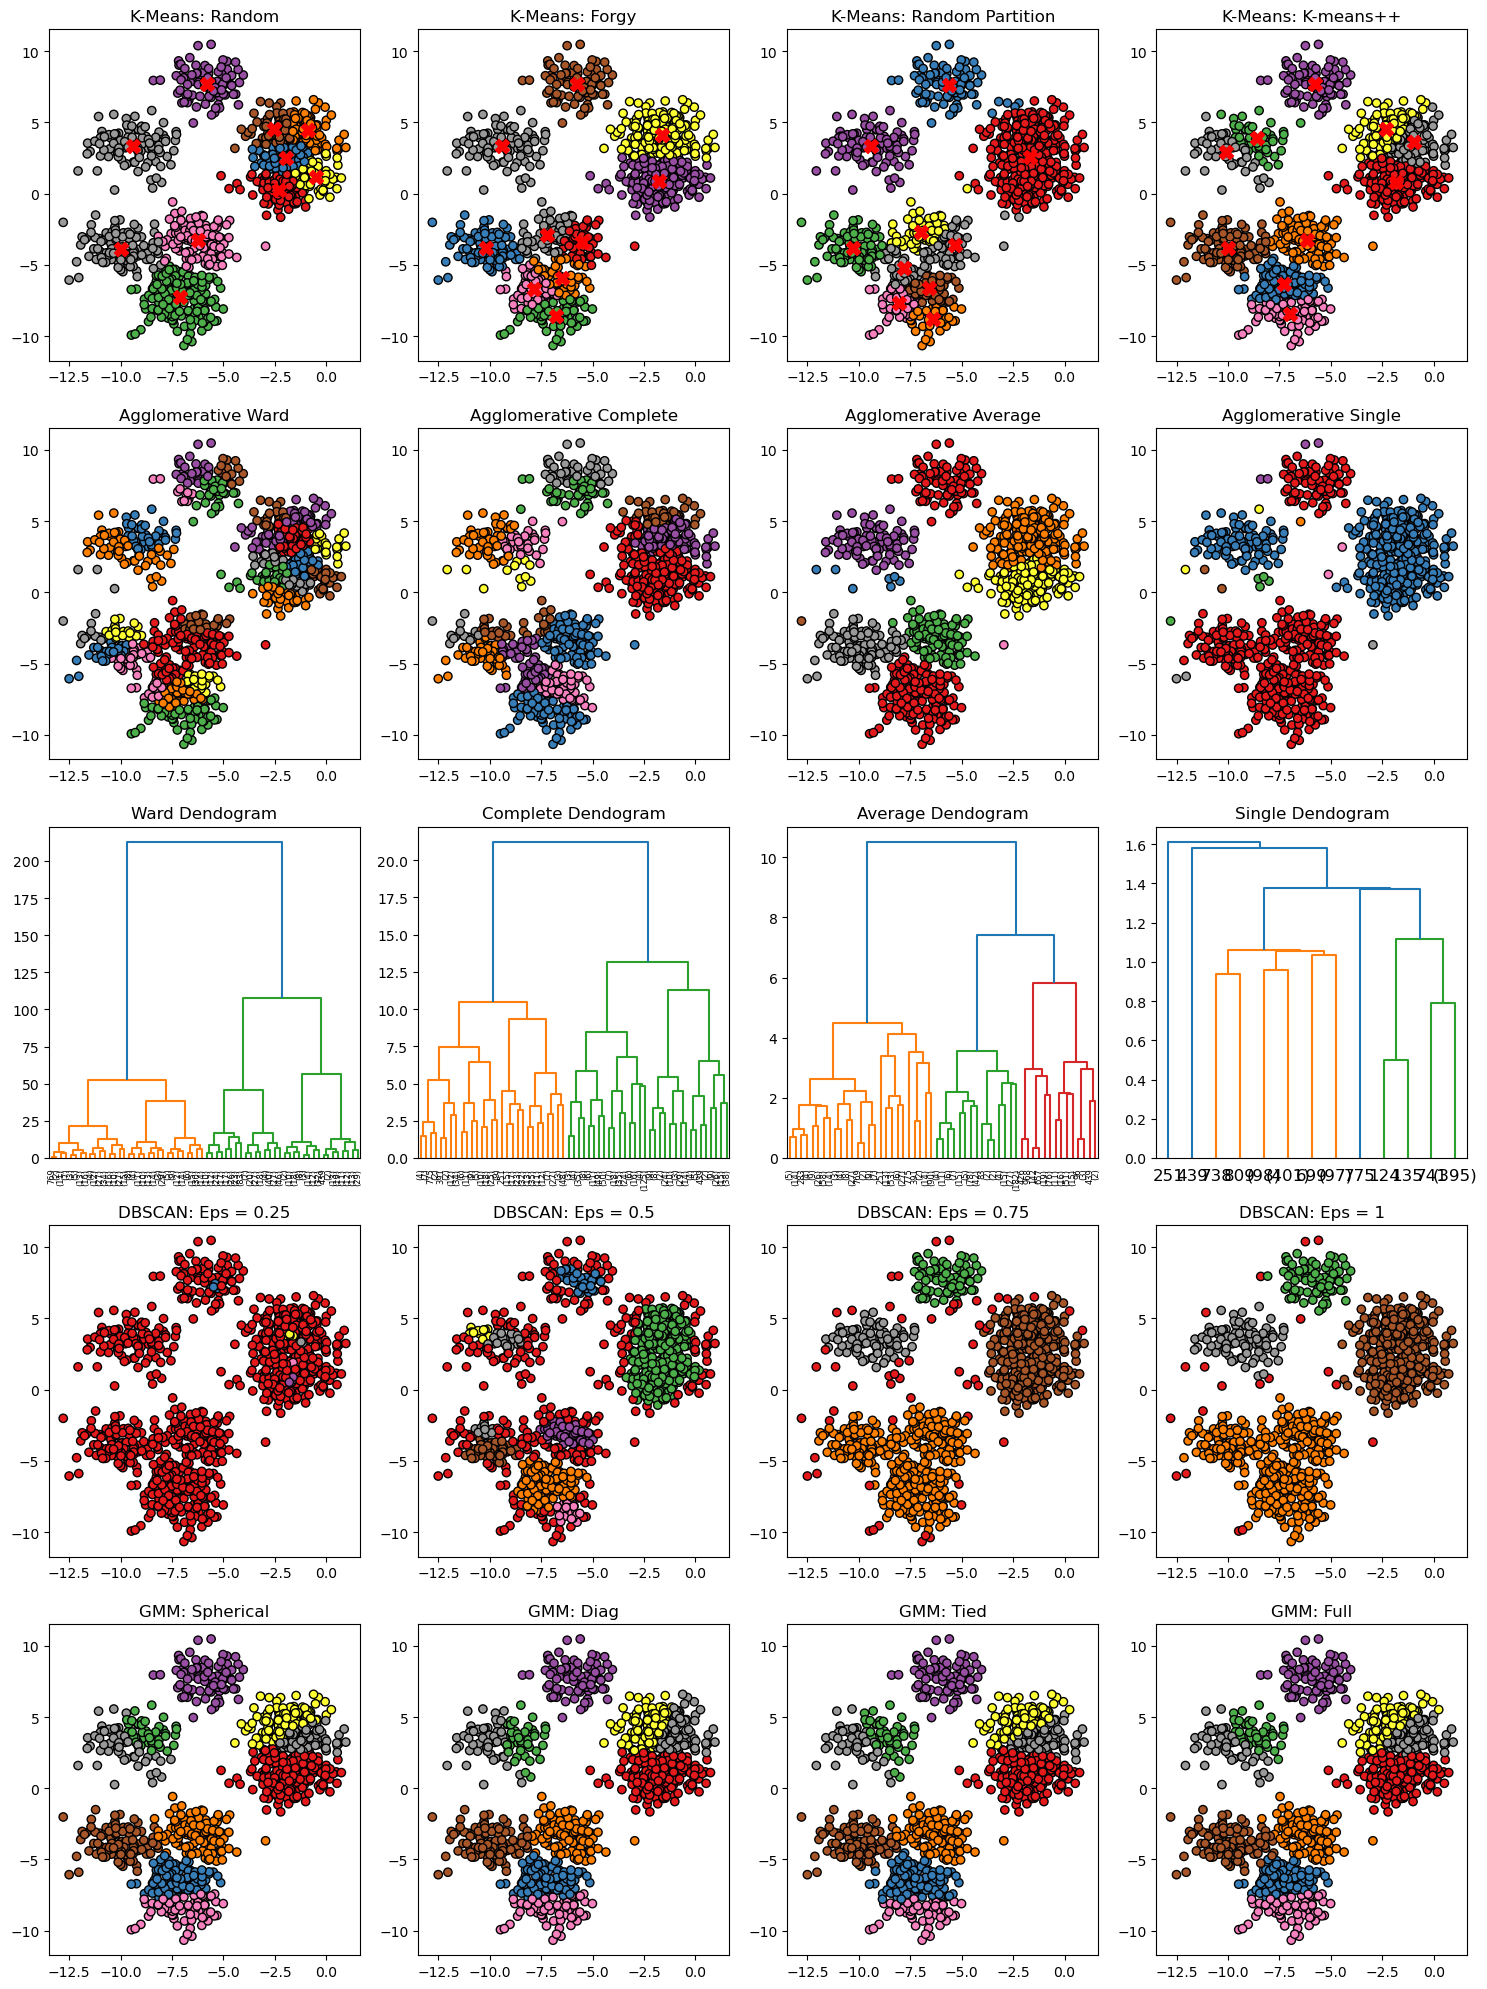

In [158]:
# Plotting the results
fig, axs = plt.subplots(5, 4, figsize=(15, 20),)

color_mapping = 'Set1'

# Random Initialization
axs[0, 0].scatter(X[:, 0], X[:, 1], c=kmeans_random.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[0, 0].scatter(kmeans_random.cluster_centers_[:, 0], kmeans_random.cluster_centers_[:, 1], s=100, c='red', marker='X')
axs[0, 0].set_title('K-Means: Random')

# Forgy Initialization
axs[0, 1].scatter(X[:, 0], X[:, 1], c=kmeans_forgy.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[0, 1].scatter(kmeans_forgy.cluster_centers_[:, 0], kmeans_forgy.cluster_centers_[:, 1], s=100, c='red', marker='X')
axs[0, 1].set_title('K-Means: Forgy')

# Random Partition Initialization
axs[0, 2].scatter(X[:, 0], X[:, 1], c=kmeans_random_partition.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[0, 2].scatter(kmeans_random_partition.cluster_centers_[:, 0], kmeans_random_partition.cluster_centers_[:, 1], s=100, c='red', marker='X')
axs[0, 2].set_title('K-Means: Random Partition')

# K-means++ Initialization
axs[0, 3].scatter(X[:, 0], X[:, 1], c=kmeans_plusplus.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[0, 3].scatter(kmeans_plusplus.cluster_centers_[:, 0], kmeans_plusplus.cluster_centers_[:, 1], s=100, c='red', marker='X')
axs[0, 3].set_title('K-Means: K-means++')

# Agglomerative Clustering Ward
axs[1, 0].scatter(X[:, 0], X[:, 1], c=agg_cluster_ward.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[1, 0].set_title('Agglomerative Ward')

# Agglomerative Clustering Complete
axs[1, 1].scatter(X[:, 0], X[:, 1], c=agg_cluster_complete.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[1, 1].set_title('Agglomerative Complete')

# Agglomerative Clustering Average
axs[1, 2].scatter(X[:, 0], X[:, 1], c=agg_cluster_average.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[1, 2].set_title('Agglomerative Average')

# Agglomerative Clustering Single
axs[1, 3].scatter(X[:, 0], X[:, 1], c=agg_cluster_single.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[1, 3].set_title('Agglomerative Single')

# Agglomerative Clustering Ward Dendrogram
dendro_ward = dendrogram(ward_linkage, ax=axs[2, 0], truncate_mode='level', p=5)
axs[2, 0].set_title('Ward Dendogram')

# Agglomerative Clustering Complete Dendrogram
dendro_ward = dendrogram(complete_linkage, ax=axs[2, 1], truncate_mode='level', p=5)
axs[2, 1].set_title('Complete Dendogram')

# Agglomerative Clustering Average Dendrogram
dendro_ward = dendrogram(average_linkage, ax=axs[2, 2], truncate_mode='level', p=5)
axs[2, 2].set_title('Average Dendogram')

# Agglomerative Clustering Single Dendrogram
dendro_ward = dendrogram(single_linkage, ax=axs[2, 3], truncate_mode='level', p=5)
axs[2, 3].set_title('Single Dendogram')

# DBSCAN
axs[3, 0].scatter(X[:, 0], X[:, 1], c=dbscan25.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[3, 0].set_title('DBSCAN: Eps = 0.25')

axs[3, 1].scatter(X[:, 0], X[:, 1], c=dbscan50.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[3, 1].set_title('DBSCAN: Eps = 0.5')

axs[3, 2].scatter(X[:, 0], X[:, 1], c=dbscan75.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[3, 2].set_title('DBSCAN: Eps = 0.75')

axs[3, 3].scatter(X[:, 0], X[:, 1], c=dbscan100.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[3, 3].set_title('DBSCAN: Eps = 1')

#GMM
axs[4, 0].scatter(X[:, 0], X[:, 1], c=gmm_spherical_labels, cmap=color_mapping, marker='o', edgecolor='k')
axs[4, 0].set_title('GMM: Spherical')

axs[4, 1].scatter(X[:, 0], X[:, 1], c=gmm_diag_labels, cmap=color_mapping, marker='o', edgecolor='k')
axs[4, 1].set_title('GMM: Diag')

axs[4, 2].scatter(X[:, 0], X[:, 1], c=gmm_tied_labels, cmap=color_mapping, marker='o', edgecolor='k')
axs[4, 2].set_title('GMM: Tied')

axs[4, 3].scatter(X[:, 0], X[:, 1], c=gmm_full_labels, cmap=color_mapping, marker='o', edgecolor='k')
axs[4, 3].set_title('GMM: Full')


fig.tight_layout()
plt.show()
